In [22]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("winequality-red.csv", delimiter = ";", header = 0)
df["quality"]=df["quality"].apply(lambda x: 0 if x>5  else 1)
X=df.drop(columns="quality")
y=df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

#א

In [24]:
dt = DecisionTreeClassifier(max_depth = 12, random_state = 0)
dt = dt.fit(X_train,y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print(f"Accuracy of the training set: ",accuracy_score(y_train, y_train_pred))
print(f"Accuracy of the test set: ",accuracy_score(y_test, y_test_pred))

Accuracy of the training set:  0.9895724713242962
Accuracy of the test set:  0.728125


#ב

Train accuracy: 0.9989572471324296
Test Accuracy: 0.8015625


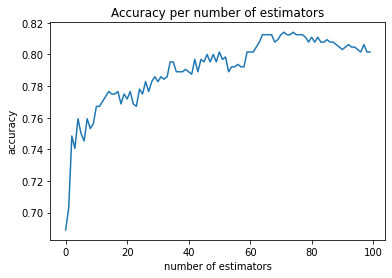

In [25]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 0)
rf = rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print("Train accuracy:" ,accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_test_pred ))
accuarcy_tests = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators = i, max_depth = 12, random_state = 0)
  rf = rf.fit(X_train,y_train)
  y_pred_test = rf.predict(X_test)
  accuarcy_tests.append(accuracy_score(y_test, y_pred_test))
plt.plot(accuarcy_tests)
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.title("Accuracy per number of estimators")
plt.show()


#ג

Train accuracy: 0.9989572471324296
Test Accuracy: 0.7859375


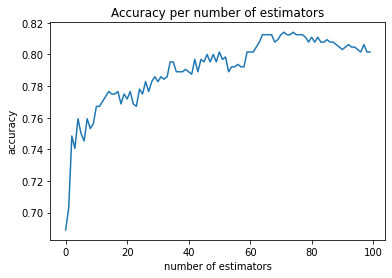

In [26]:
num_features=np.shape(X_train)[1]
rf = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 0, max_features=num_features)
rf = rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print("Train accuracy:" ,accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_test_pred ))
accuarcy_tests = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators = i, max_depth = 12, random_state = 0)
  rf = rf.fit(X_train,y_train)
  y_pred_test = rf.predict(X_test)
  accuarcy_tests.append(accuracy_score(y_test, y_pred_test))
plt.plot(accuarcy_tests)
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.title("Accuracy per number of estimators")
plt.show()


#ד

##a

<div dir="rtl">


המודל של סעיף ב' (Random Forest) טוב יותר מהמודל בסעיף א' (עץ החלטה). 


מכיוון שבמודל זה אנו משתמשים ב 100 עצים במקום בעץ אחד בודד(סעיף א')
בנוסף מודל הRandom Forest פחות רגיש ל-overfitting מאשר עץ בודד, לכן שגיאת ההכללה שלו טובה יותר
</div>

##b

<div dir="rtl">


השינוי שנעשה בסעיף ג' נתן ביצועים פחות טובים בהשוואה לRandom Forest  הרגיל מסעיף ב'.

הסיבה לכך היא שעל ידי שימוש בכל הפיצ'רים(וביטול אקראיות) העצים נהים יותר דומים זה לזה וכך אנו מאבדים את הככלה שנותן לנו האלגוריתם של Random Forest ואנו נוטים לעשות overfitting,

בשונה ממודל הRandom Forest  הרגיל  בו הבחירה האקראית של הפיצ'רים בכל פיצול גורמת שהעצים יהיו שונים זה מזה (מקטינה את הקורלציה ביניהם) וכתוצאה מכך המודל מכליל בצורה טובה יותר
</div>